In [1]:
!pip install pandas seaborn

In [2]:
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np
import collections
import operator
import scipy.stats
import random
import math
import random
import seaborn as sns
import pandas as pd
import scipy.cluster.hierarchy
from pylab import savefig
import os

In [3]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGE_OUTPUT_DIRECTORY = os.path.join(PROJECT_ROOT_DIR, "plots");

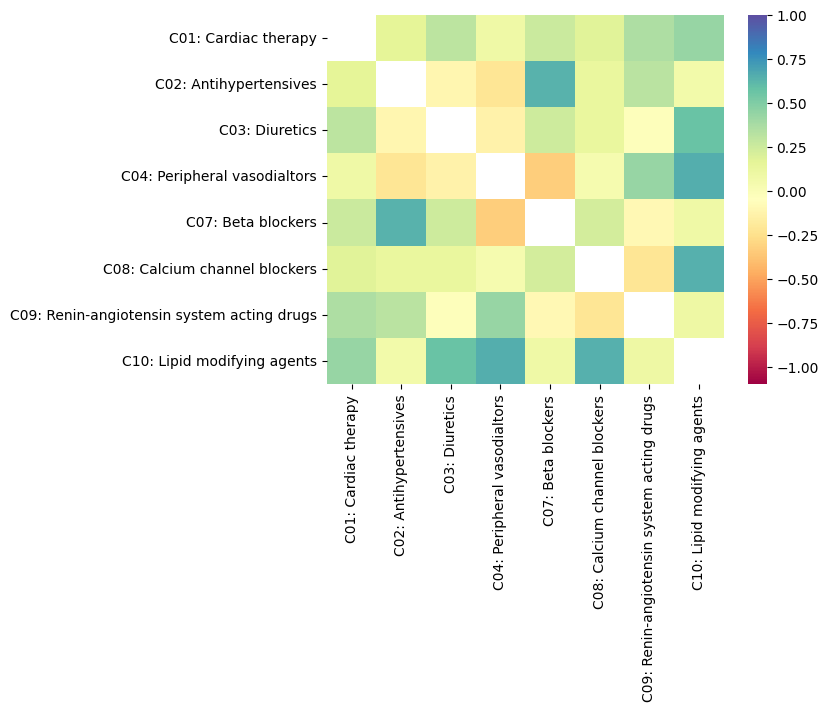

In [4]:
med_cat_fleiss = np.array([[np.NaN, 0.15922402691812426, 0.30946051602814717, 0.08522727272727164, 0.2611907521330226, 0.17931090923970855, 0.3522535517519113, 0.4270808751643459],
                 [0.15922402691812426, np.NaN, -0.11105077382568576, -0.22222222222222268, 0.63199402291217, 0.12283527990334261, 0.3155896185333568, 0.05877268798616957],
                 [0.30946051602814717, -0.11105077382568576, np.NaN, -0.13207547169811285, 0.2525481313703284, 0.12229075887046574, -0.03255494362487379, 0.5657002795756582],
                 [0.08522727272727164, -0.22222222222222268, -0.13207547169811285, np.NaN, -0.3333333333333333, 0.0350877192982455, 0.4322127005053834, 0.6550071873502636],
                 [0.2611907521330226, 0.63199402291217, 0.2525481313703284, -0.3333333333333333, np.NaN, 0.22133247918001275, -0.0957936247124548, 0.08494460134695116], 
                 [0.17931090923970855, 0.12283527990334261, 0.12229075887046574, 0.0350877192982455, 0.22133247918001275, np.NAN, -0.2185840979531718, 0.6402906742026641], 
                 [0.3522535517519113, 0.3155896185333568, -0.03255494362487379, 0.4322127005053834, -0.0957936247124548, -0.2185840979531718, np.NAN, 0.08971941887545684], 
                 [0.4270808751643459, 0.05877268798616957, 0.5657002795756582, 0.6550071873502636, 0.08494460134695116, 0.6402906742026641, 0.08971941887545684, np.NaN]])

column_names_categories = ["C01: Cardiac therapy", "C02: Antihypertensives", "C03: Diuretics", "C04: Peripheral vasodialtors", "C07: Beta blockers", "C08: Calcium channel blockers", "C09: Renin-angiotensin system acting drugs", "C10: Lipid modifying agents"]
row_names_categories = ["C01: Cardiac therapy", "C02: Antihypertensives", "C03: Diuretics", "C04: Peripheral vasodialtors", "C07: Beta blockers", "C08: Calcium channel blockers", "C09: Renin-angiotensin system acting drugs", "C10: Lipid modifying agents"]
dfm_cats = pd.DataFrame(med_cat_fleiss, columns=column_names_categories, index=row_names_categories)

figf_cats = sns.heatmap(dfm_cats, cmap='Spectral', vmin=1, vmax=-1)

In [5]:
figfigure_cat = figf_cats.get_figure()    
figfigure_cat.savefig(os.path.join(IMAGE_OUTPUT_DIRECTORY,"heatmap-cat-300.tiff"), bbox_inches='tight', dpi=300)

In [6]:
figfigure_cat = figf_cats.get_figure()    
figfigure_cat.savefig(os.path.join(IMAGE_OUTPUT_DIRECTORY,"heatmap-cat-300.png"), bbox_inches='tight', dpi=300)

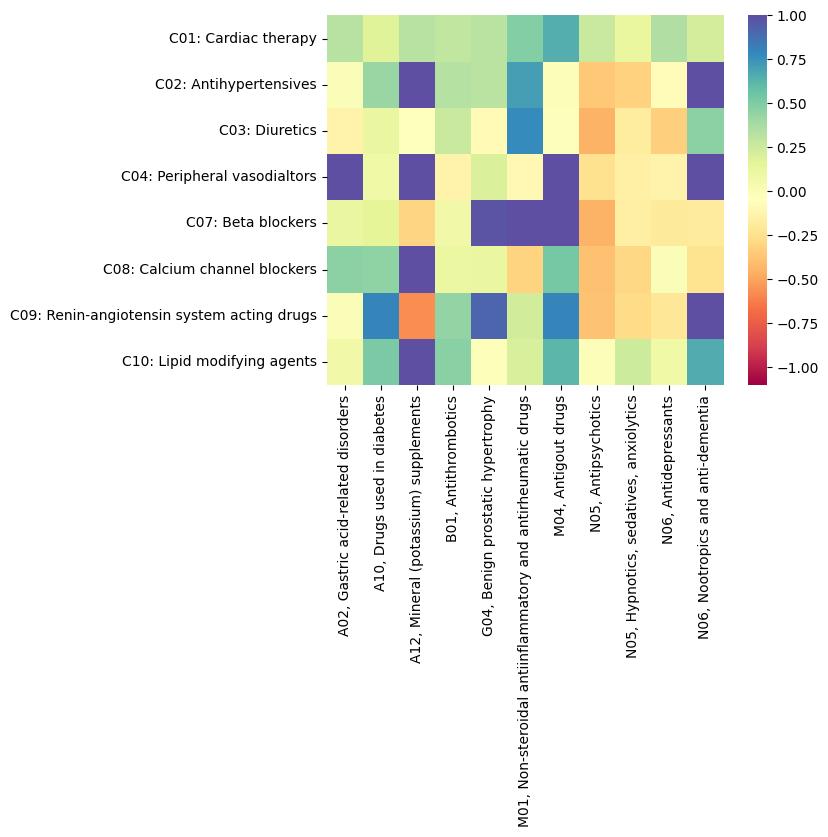

In [7]:
column_names_others = ["A02, Gastric acid-related disorders", "A10, Drugs used in diabetes", "A12, Mineral (potassium) supplements", "B01, Antithrombotics", "G04, Benign prostatic hypertrophy", "M01, Non-steroidal antiinflammatory and antirheumatic drugs", "M04, Antigout drugs", "N05, Antipsychotics", "N05, Hypnotics, sedatives, anxiolytics", "N06, Antidepressants", "N06, Nootropics and anti-dementia"]
med_oth_fleiss = np.array([[0.327339513730977, 0.179552939119284, 0.324643078833023, 0.287170554658564, 0.315107913669064, 0.485291335420873, 0.653692251727901, 0.267207591792415, 0.128608598337387, 0.345143264772322, 0.227974568574023],
                 [-0.00414937759337297, 0.419781803885594, 1, 0.330251745818733, 0.311731843575418, 0.708994708994709, -0.0153846153846124, -0.36021505376344, -0.31275931192019, -0.0796535870843579, 1],
                 [-0.136321711861279, 0.1176533622900579, -0.03636363636363632, 0.2647112459788901, -0.0869928201703124, 0.7722754382794145, -0.032833917755817774, -0.44747863963813034, -0.17817452580564339, -0.3219276047970073, 0.46236559139784983],
                 [1, 0.0867799669123177, 1, -0.12784118154790436, 0.20310478654592476, -0.09848794442174093, 1, -0.2428078250863059, -0.15107913669064738, -0.125, 1],
                 [0.12194522903107051, 0.16147765768672373, -0.3000000000000003, 0.07087144616485792, 0.9781171095346881, 1, 1, -0.44866997754949306, -0.16374187772993168, -0.18948932509580071, -0.18264520643806847], 
                 [0.4618235730170497, 0.4549577640455813, 1, 0.10750234867803046, 0.11812827225130877, -0.31143921622740445, 0.5319148936170212, -0.39025134832604014, -0.29351946010908747, -0.006901561932437382, -0.23066798288910828], 
                 [-0.007836045810726314, 0.7958377574856657, -0.5704187058183795, 0.440156562658047, 0.9108997119313993, 0.23675658744763312, 0.801047120418848, -0.38088829071332414, -0.27611818828226065, -0.21005586592178724, 1], 
                 [0.06831648658069107, 0.5117348743955653, 1, 0.4742113169754617, -0.020242914979752082, 0.21214004936465808, 0.6144922363019812, -0.010132501948551883, 0.25333333333333313, 0.08603667136812532, 0.6622889305816152]])
dfm_cats_oth = pd.DataFrame(med_oth_fleiss, columns=column_names_others, index=row_names_categories)
figf_oth = sns.heatmap(dfm_cats_oth, cmap='Spectral', vmin=1, vmax=-1)

In [8]:
figfigure_oth = figf_oth.get_figure()    
figfigure_oth.savefig(os.path.join(IMAGE_OUTPUT_DIRECTORY,"heatmap-oth-300.tiff"), bbox_inches='tight', dpi=300)

In [9]:
figfigure_oth = figf_oth.get_figure()    
figfigure_oth.savefig(os.path.join(IMAGE_OUTPUT_DIRECTORY,"heatmap-oth-300.png"), bbox_inches='tight', dpi=300)